# 🧬 Malaria Detection Using CNN 

**📝 Introduction**
Malaria is a life-threatening disease transmitted through the bite of infected mosquitoes.
Microscopic examination of blood smears remains a primary method for malaria diagnosis.
This project focuses on developing a a convolutional neural network (CNN) to classify microscopic images of blood smears into two categories:

Parasitized (Malaria-infected cells)

Uninfected (Healthy blood cells)

We train and evaluate a model using a publicly available Malaria Dataset on Kaggle.

**📂 Dataset Description**
Source: Malaria Detection Dataset

**Structure:**

train/Parasitized/ and train/Uninfected/

valid/Parasitized/ and valid/Uninfected/

test/Parasitized/ and test/Uninfected/

Image Size: 224x224 pixels

Format: JPG images

**License: Apache 2.0**



In [21]:
import os
import sys
import io

# Capture the print output
saved_stdout = sys.stdout  # Save original stdout
sys.stdout = io.StringIO() # Redirect stdout to string buffer

# --- Your code ---
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# ------------------

# Restore original stdout
sys.stdout = saved_stdout


# Step 1:
 * We Define Paths and Explore Directory Structure of the dataset in our enviroment.

In [2]:
# Define dataset base path
import os 
base_dir = '/kaggle/input/malaria-detection/Malaria Dataset'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Check available folders
print("Train folders:", os.listdir(train_dir))
print("Validation folders:", os.listdir(valid_dir))
print("Test folders:", os.listdir(test_dir))


Train folders: ['Uninfected', 'Parasitized']
Validation folders: ['Uninfected', 'Parasitized']
Test folders: ['Uninfected', 'Parasitized']


# Step 2 Check Class Balance
We count the number of images per class:

Training:

Validation:

Test:



# **Step 3: Visualize Random Samples**

We display random examples from each class.
Observations:
* Parasitized cells show dark inclusions (parasites).
* Uninfected cells appear clean and smooth.




In [3]:
# Function to count images in each class
def count_images_in_folder(folder_path):
    classes = os.listdir(folder_path)
    counts = {}
    for cls in classes:
        cls_path = os.path.join(folder_path, cls)
        counts[cls] = len(os.listdir(cls_path))
    return counts

# Count images in train, validation, and test
train_counts = count_images_in_folder(train_dir)
valid_counts = count_images_in_folder(valid_dir)
test_counts = count_images_in_folder(test_dir)

print("Training Set Image Counts:", train_counts)
print("Validation Set Image Counts:", valid_counts)
print("Test Set Image Counts:", test_counts)


Training Set Image Counts: {'Uninfected': 6582, 'Parasitized': 6570}
Validation Set Image Counts: {'Uninfected': 624, 'Parasitized': 629}
Test Set Image Counts: {'Uninfected': 317, 'Parasitized': 309}


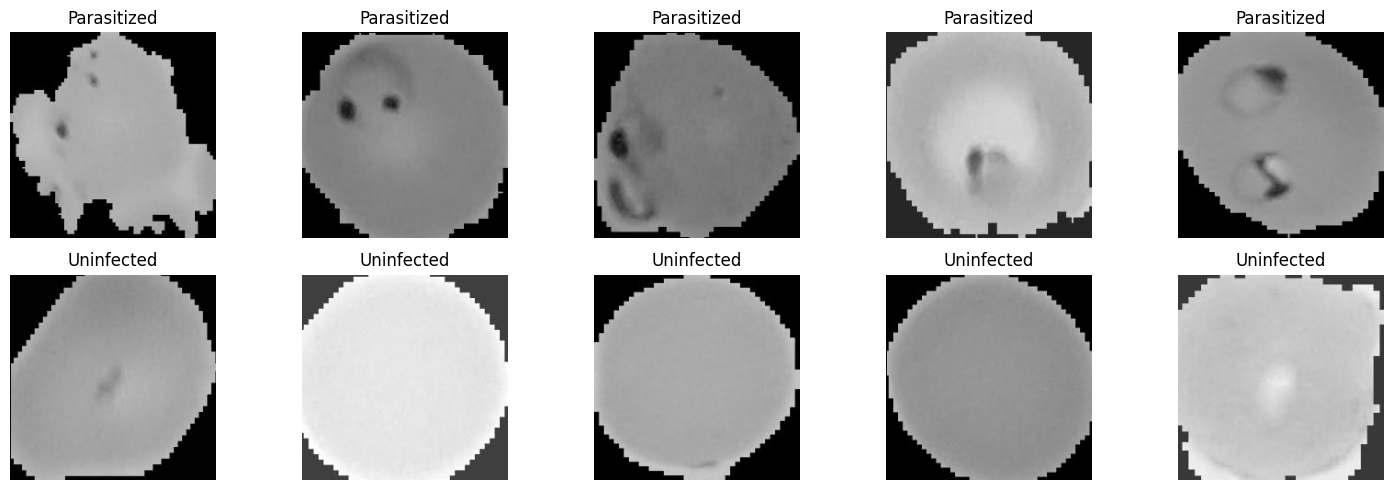

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Function to display random samples from both classes
def visualize_random_samples(folder_path, num_samples=5):
    parasitized_path = os.path.join(folder_path, 'Parasitized')
    uninfected_path = os.path.join(folder_path, 'Uninfected')
    
    parasitized_images = random.sample(os.listdir(parasitized_path), num_samples)
    uninfected_images = random.sample(os.listdir(uninfected_path), num_samples)
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))
    
    for i in range(num_samples):
        parasitized_img = Image.open(os.path.join(parasitized_path, parasitized_images[i]))
        uninfected_img = Image.open(os.path.join(uninfected_path, uninfected_images[i]))
        
        axes[0, i].imshow(parasitized_img)
        axes[0, i].set_title('Parasitized')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(uninfected_img)
        axes[1, i].set_title('Uninfected')
        axes[1, i].axis('off')
        
    plt.tight_layout()
    plt.show()

# Visualize from the train set
visualize_random_samples(train_dir)


# **🔬 Observations:**

Class	Appearance
Parasitized	there are dark spots or patches inside the cell (the malaria parasites).
Uninfected	The cells are smoother, more regular, and without dark intrusions.

**📢 What This Tells Us:**
The model will likely learn to detect parasites based on local texture/shape anomalies inside the cell.

# **Step 4 :Check Image Sizes**
We ensure all images are consistently 224x224 pixels.

In [5]:
# Function to check image sizes across dataset
def check_image_sizes(folder_path):
    sizes = []
    classes = os.listdir(folder_path)
    for cls in classes:
        cls_dir = os.path.join(folder_path, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            img = Image.open(img_path)
            sizes.append(img.size)
    return set(sizes)

# Check for Train, Validation, and Test
print("Train Image Sizes:", check_image_sizes(train_dir))
print("Validation Image Sizes:", check_image_sizes(valid_dir))
print("Test Image Sizes:", check_image_sizes(test_dir))


Train Image Sizes: {(224, 224)}
Validation Image Sizes: {(224, 224)}
Test Image Sizes: {(224, 224)}


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# **🏗️ Step 5: Building the CNN Model**
We design a CNN using this architeture:
* 4 convolutional blocks help in extracting detailed features
* Batch Normalization after each convolution for stability
* ReLU activation for non linearity
* MaxPooling after each block to reduce spatal dimensions and avoiding overfitting
* Fully connected layers
* Dropout for regularization
* ✅ Output layer: 2 neurons (for 2 classes).


















In [7]:

# Define the CNN Model
class BasicCNN(nn.Module):
    """
    Basic Convolutional Neural Network for binary classification (Malaria detection).
    
    Architecture:
        - 4 convolutional blocks (Conv + BatchNorm + ReLU + MaxPool)
        - 2 fully connected layers (with Dropout)
        - Final output: 2 neurons (for 2 classes)
    """
    def __init__(self):
        super(BasicCNN, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        
        # Second Convolutional Block
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        # Third Convolutional Block
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Fourth Convolutional Block
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 14 * 14, 512)  # (224 / 2^4 = 14 after 4 pools)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 2)  # Output: 2 classes (Parasitized / Uninfected)

    def forward(self, x):
        # Convolutional layers with ReLU and MaxPooling
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)

        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, 2)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


In [8]:
#instatiate the model
# Define the device first
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the model
model = BasicCNN()
model = model.to(device)  # Move model to the device

print(f"Model is using device: {device}")


Model is using device: cuda


# **Step 6 :Defining Loss Function, Optimizer, and Dataloaders**
* Loss Function: CrossEntropyLoss (multi-class classification)
* Optimizer: Adam (adaptive learning rate)
* Data Augmentation: Random horizontal flips and rotations during training
* Normalization: Simple normalization to [-1,1] range








In [9]:
#Define loss, optimizer:

import torch.optim as optim

# Loss function: CrossEntropyLoss (for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (adaptive learning rates)
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [10]:
#Set Up Data Transforms and DataLoaders
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data augmentation for training
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to mean 0, std 1 (simplified)
])

# Just resizing and normalizing for validation and test
val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=val_test_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

# Load data in batches
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)


# **🔥 Step 7: Training the Model**
We train the model for 10 epochs, recording:

Training loss

Validation loss

Training accuracy

Validation accuracy

✅ Metrics are saved for later visualization.


In [11]:
# --- Initialize metrics history lists ---
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


In [12]:
# --- Training Settings ---
num_epochs = 10

# --- Training Loop ---
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    # --- Validation Step ---
    model.eval()
    val_loss = 0.0
    val_corrects = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

    val_loss = val_loss / len(valid_dataset)
    val_acc = val_corrects.double() / len(valid_dataset)

    # --- Save Metrics History ---
    train_losses.append(epoch_loss)
    val_losses.append(val_loss)
    train_accuracies.append(epoch_acc.cpu())
    val_accuracies.append(val_acc.cpu())

    # --- Print Epoch Summary ---
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    print('-' * 30)


Epoch 1/10
Train Loss: 1.1253, Train Acc: 0.5902
Val Loss: 0.5888, Val Acc: 0.7358
------------------------------
Epoch 2/10
Train Loss: 0.5000, Train Acc: 0.7578
Val Loss: 0.5224, Val Acc: 0.6225
------------------------------
Epoch 3/10
Train Loss: 0.3665, Train Acc: 0.8515
Val Loss: 0.2835, Val Acc: 0.9274
------------------------------
Epoch 4/10
Train Loss: 0.3093, Train Acc: 0.8816
Val Loss: 0.2140, Val Acc: 0.9218
------------------------------
Epoch 5/10
Train Loss: 0.2860, Train Acc: 0.8980
Val Loss: 0.1783, Val Acc: 0.9433
------------------------------
Epoch 6/10
Train Loss: 0.2775, Train Acc: 0.9019
Val Loss: 0.1784, Val Acc: 0.9433
------------------------------
Epoch 7/10
Train Loss: 0.2608, Train Acc: 0.9122
Val Loss: 0.1790, Val Acc: 0.9401
------------------------------
Epoch 8/10
Train Loss: 0.2418, Train Acc: 0.9161
Val Loss: 0.2064, Val Acc: 0.9441
------------------------------
Epoch 9/10
Train Loss: 0.2299, Train Acc: 0.9195
Val Loss: 0.1555, Val Acc: 0.9441
-----

# **📊 Step 8: Visualizing Training Progress**
We plot:

Training vs Validation Loss Curve

Training vs Validation Accuracy Curve

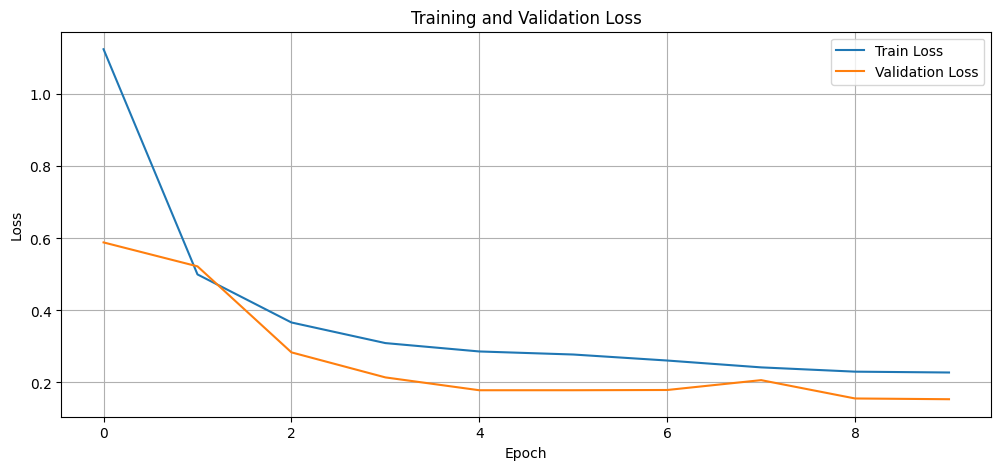

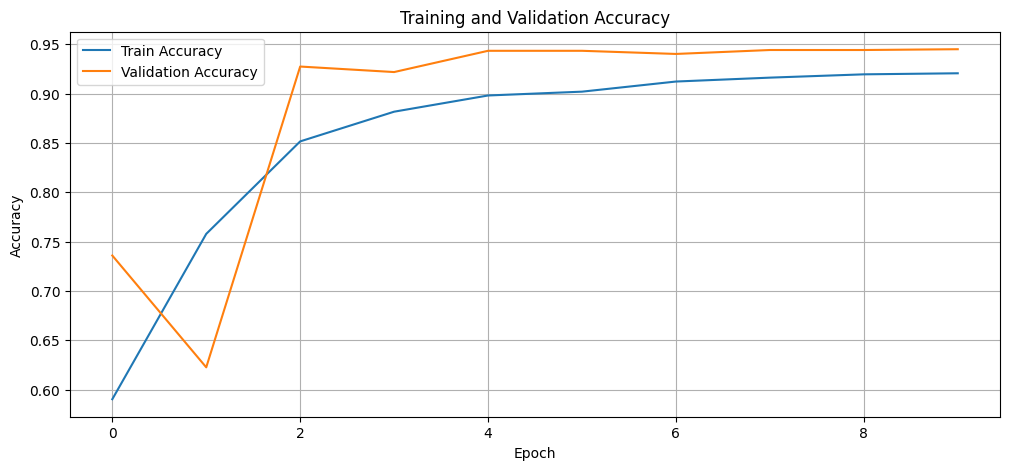

In [13]:
# --- Loss Curves ---
plt.figure(figsize=(12,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Accuracy Curves ---
plt.figure(figsize=(12,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **🧪 Step 9: Evaluation on Test Set**
After training, we evaluate the model using multiple metrics:

Accuracy

Precision

Recall

F1 Score

We also visualize:

Confusion Matrix: to understand misclassification patterns.

Precision-Recall (PR) Curve: especially important for medical diagnosis tasks where false negatives are costly.

🎯 Test Accuracy: 0.9377
🎯 Precision: 0.9064
🎯 Recall: 0.9779
🎯 F1 Score: 0.9408


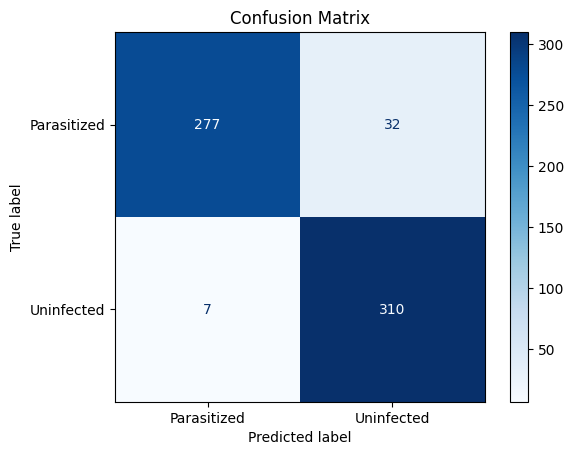

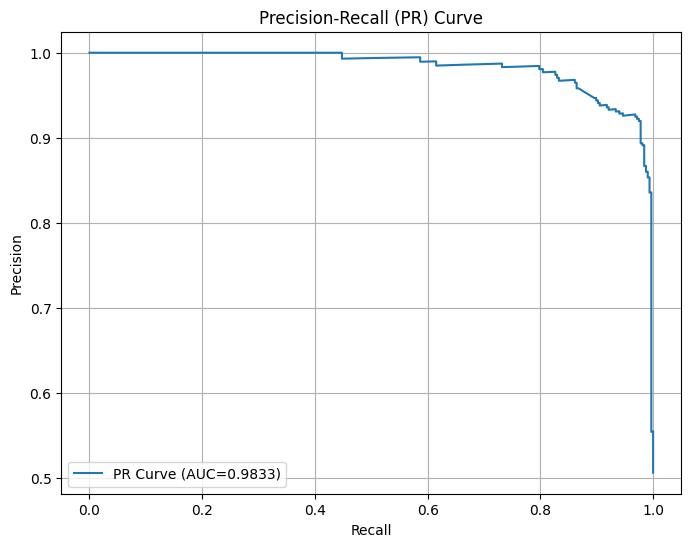

In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                              confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc)

# --- Test Evaluation ---
model.eval()

y_true = []
y_pred = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of "Parasitized"
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(probs.cpu().numpy())

# --- Calculate metrics ---
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"🎯 Test Accuracy: {acc:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🎯 Recall: {recall:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Parasitized", "Uninfected"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# --- Precision-Recall Curve ---
precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_probs)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8,6))
plt.plot(recall_vals, precision_vals, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend()
plt.grid(True)
plt.show()


# **Step 8: Visualizing Predictions**
We randomly select and display test images alongside:

The true label and

The predicted label.

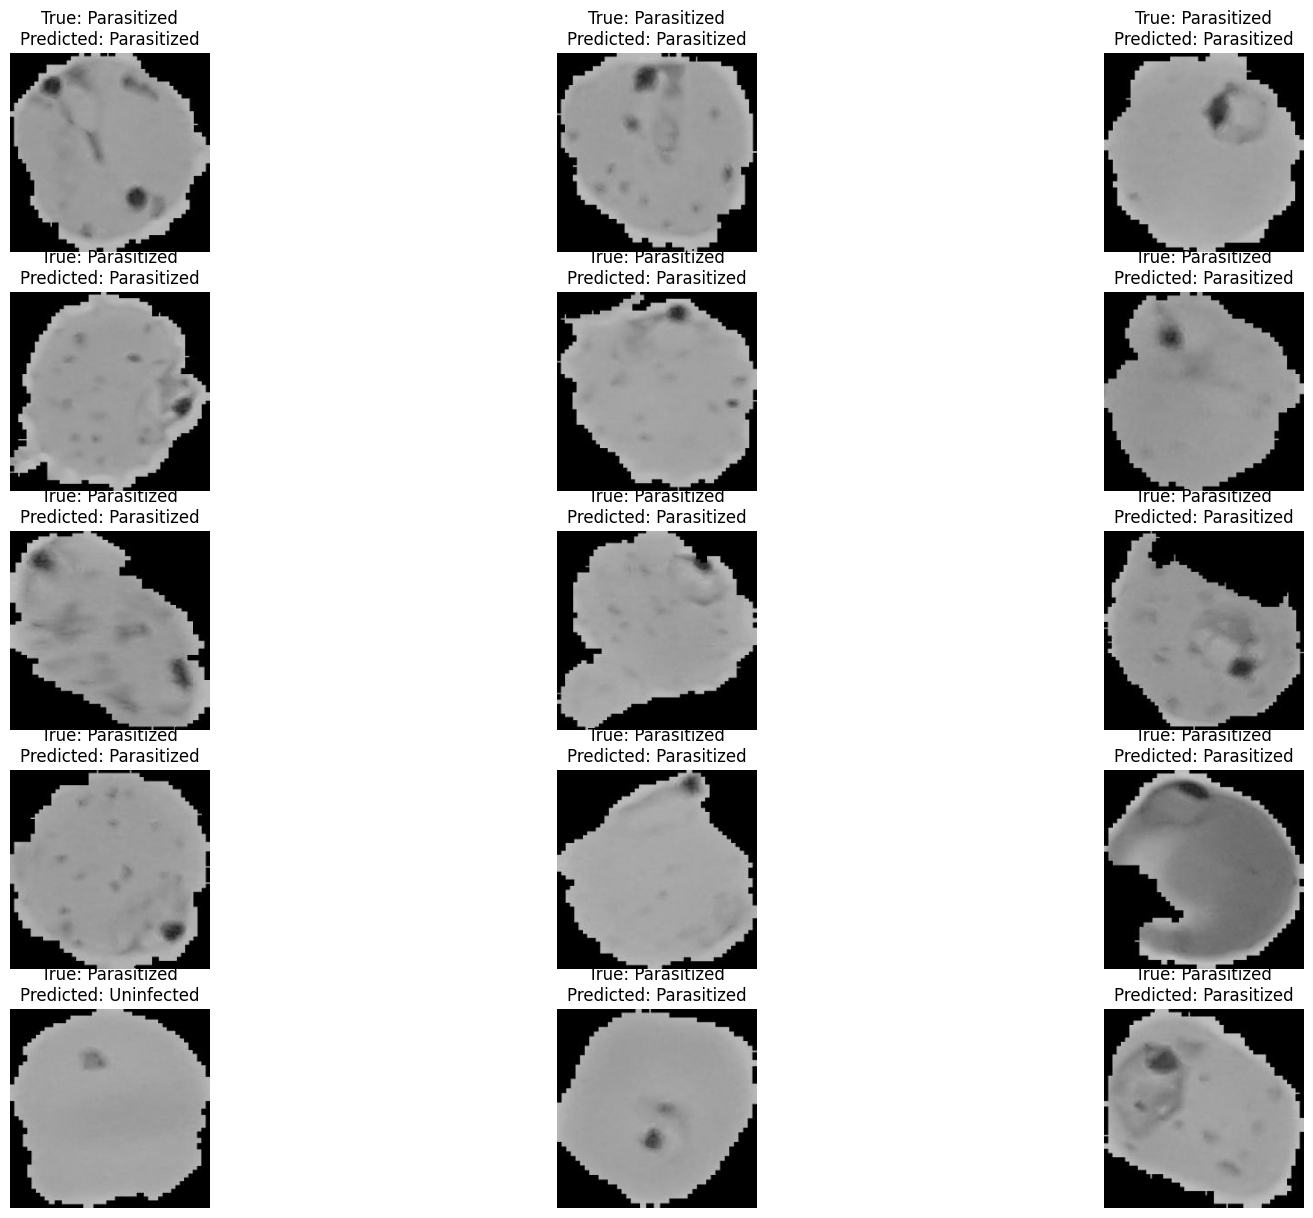

In [20]:
import random

# --- Function to visualize model predictions ---
def visualize_predictions(model, dataloader, class_names, num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(20, 15))

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size(0)):
                images_so_far += 1
                ax = plt.subplot(num_images//3, 3, images_so_far)
                ax.axis('off')
                ax.set_title(f"True: {class_names[labels[j]]}\nPredicted: {class_names[preds[j]]}")
                img = inputs[j].cpu().numpy().transpose((1, 2, 0))
                img = img * 0.5 + 0.5  # Unnormalize
                plt.imshow(img)

                if images_so_far == num_images:
                    model.train()
                    return
        model.train()


class_names = ['Parasitized', 'Uninfected']

# --- Call function ---
visualize_predictions(model, test_loader, class_names, num_images=15)


In [25]:
from torchvision import models
criterion = nn.CrossEntropyLoss()
num_epochs = 10
learning_rate = 0.001
# Initialize ResNet18 (no pretraining)
resnet18 = models.resnet18(pretrained=False)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 2)  # 2 classes
resnet18 = resnet18.to(device)

optimizer_resnet = optim.Adam(resnet18.parameters(), lr=learning_rate)

print("🔵 Training ResNet18...")
resnet18_train_losses = []
resnet18_val_losses = []
resnet18_train_accs = []
resnet18_val_accs = []

for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_resnet.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_resnet.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    resnet18_train_losses.append(epoch_loss)
    resnet18_train_accs.append(epoch_acc.item())
    
    # Validation
    resnet18.eval()
    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
    
    val_epoch_loss = val_loss / len(valid_loader.dataset)
    val_epoch_acc = val_corrects.double() / len(valid_loader.dataset)
    resnet18_val_losses.append(val_epoch_loss)
    resnet18_val_accs.append(val_epoch_acc.item())
    
    print(f"Epoch {epoch+1}/{num_epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_epoch_acc:.4f}")


🔵 Training ResNet18...
Epoch 1/10 | Train Acc: 0.7774 | Val Acc: 0.7925
Epoch 2/10 | Train Acc: 0.9218 | Val Acc: 0.9481
Epoch 3/10 | Train Acc: 0.9355 | Val Acc: 0.9449
Epoch 4/10 | Train Acc: 0.9420 | Val Acc: 0.9529
Epoch 5/10 | Train Acc: 0.9466 | Val Acc: 0.9545
Epoch 6/10 | Train Acc: 0.9510 | Val Acc: 0.9585
Epoch 7/10 | Train Acc: 0.9465 | Val Acc: 0.9545
Epoch 8/10 | Train Acc: 0.9537 | Val Acc: 0.9593
Epoch 9/10 | Train Acc: 0.9516 | Val Acc: 0.9569
Epoch 10/10 | Train Acc: 0.9541 | Val Acc: 0.9617


In [28]:
# Initialize EfficientNet-B0
effnet = models.efficientnet_b0(pretrained=False)
effnet.classifier[1] = nn.Linear(effnet.classifier[1].in_features, 2)
effnet = effnet.to(device)

optimizer_effnet = optim.Adam(effnet.parameters(), lr=learning_rate)

print("🟢 Training EfficientNet-B0...")
effnet_train_losses = []
effnet_val_losses = []
effnet_train_accs = []
effnet_val_accs = []

for epoch in range(num_epochs):
    effnet.train()
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_effnet.zero_grad()
        outputs = effnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_effnet.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    effnet_train_losses.append(epoch_loss)
    effnet_train_accs.append(epoch_acc.item())
    
    # Validation
    effnet.eval()
    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = effnet(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
    
    val_epoch_loss = val_loss / len(valid_loader.dataset)
    val_epoch_acc = val_corrects.double() / len(valid_loader.dataset)
    effnet_val_losses.append(val_epoch_loss)
    effnet_val_accs.append(val_epoch_acc.item())
    
   
    print(f"Epoch {epoch+1}/{num_epochs} | "
      f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f} | "
      f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")



🟢 Training EfficientNet-B0...
Epoch 1/10 | Train Loss: 0.4430 | Train Acc: 0.7604 | Val Loss: 0.2156 | Val Acc: 0.9433
Epoch 2/10 | Train Loss: 0.1775 | Train Acc: 0.9443 | Val Loss: 0.1482 | Val Acc: 0.9457
Epoch 3/10 | Train Loss: 0.1604 | Train Acc: 0.9472 | Val Loss: 0.1640 | Val Acc: 0.9385
Epoch 4/10 | Train Loss: 0.1476 | Train Acc: 0.9519 | Val Loss: 0.1235 | Val Acc: 0.9561
Epoch 5/10 | Train Loss: 0.1386 | Train Acc: 0.9557 | Val Loss: 0.1300 | Val Acc: 0.9593
Epoch 6/10 | Train Loss: 0.1381 | Train Acc: 0.9547 | Val Loss: 0.1141 | Val Acc: 0.9593
Epoch 7/10 | Train Loss: 0.1283 | Train Acc: 0.9581 | Val Loss: 0.1085 | Val Acc: 0.9625
Epoch 8/10 | Train Loss: 0.1277 | Train Acc: 0.9584 | Val Loss: 0.1164 | Val Acc: 0.9601
Epoch 9/10 | Train Loss: 0.1291 | Train Acc: 0.9579 | Val Loss: 0.1085 | Val Acc: 0.9617
Epoch 10/10 | Train Loss: 0.1192 | Train Acc: 0.9599 | Val Loss: 0.1122 | Val Acc: 0.9577


In [30]:
# Initialize DenseNet121
densenet = models.densenet121(pretrained=False)
densenet.classifier = nn.Linear(densenet.classifier.in_features, 2)
densenet = densenet.to(device)

optimizer_densenet = optim.Adam(densenet.parameters(), lr=learning_rate)

print("🟣 Training DenseNet121...")
densenet_train_losses = []
densenet_val_losses = []
densenet_train_accs = []
densenet_val_accs = []

for epoch in range(num_epochs):
    densenet.train()
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_densenet.zero_grad()
        outputs = densenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_densenet.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    densenet_train_losses.append(epoch_loss)
    densenet_train_accs.append(epoch_acc.item())
    
    # Validation
    densenet.eval()
    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = densenet(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
    
    val_epoch_loss = val_loss / len(valid_loader.dataset)
    val_epoch_acc = val_corrects.double() / len(valid_loader.dataset)
    densenet_val_losses.append(val_epoch_loss)
    densenet_val_accs.append(val_epoch_acc.item())
    
   
    print(f"Epoch {epoch+1}/{num_epochs} | "
      f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f} | "
      f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")



🟣 Training DenseNet121...
Epoch 1/10 | Train Loss: 0.3693 | Train Acc: 0.8362 | Val Loss: 0.1915 | Val Acc: 0.9370
Epoch 2/10 | Train Loss: 0.2083 | Train Acc: 0.9313 | Val Loss: 0.1680 | Val Acc: 0.9457
Epoch 3/10 | Train Loss: 0.1904 | Train Acc: 0.9356 | Val Loss: 0.1703 | Val Acc: 0.9505
Epoch 4/10 | Train Loss: 0.1836 | Train Acc: 0.9389 | Val Loss: 0.1744 | Val Acc: 0.9449
Epoch 5/10 | Train Loss: 0.1750 | Train Acc: 0.9398 | Val Loss: 0.1444 | Val Acc: 0.9529
Epoch 6/10 | Train Loss: 0.1684 | Train Acc: 0.9436 | Val Loss: 0.1357 | Val Acc: 0.9537
Epoch 7/10 | Train Loss: 0.1634 | Train Acc: 0.9465 | Val Loss: 0.1595 | Val Acc: 0.9481
Epoch 8/10 | Train Loss: 0.1563 | Train Acc: 0.9477 | Val Loss: 0.1338 | Val Acc: 0.9545
Epoch 9/10 | Train Loss: 0.1510 | Train Acc: 0.9488 | Val Loss: 0.1893 | Val Acc: 0.9354
Epoch 10/10 | Train Loss: 0.1498 | Train Acc: 0.9496 | Val Loss: 0.1500 | Val Acc: 0.9585


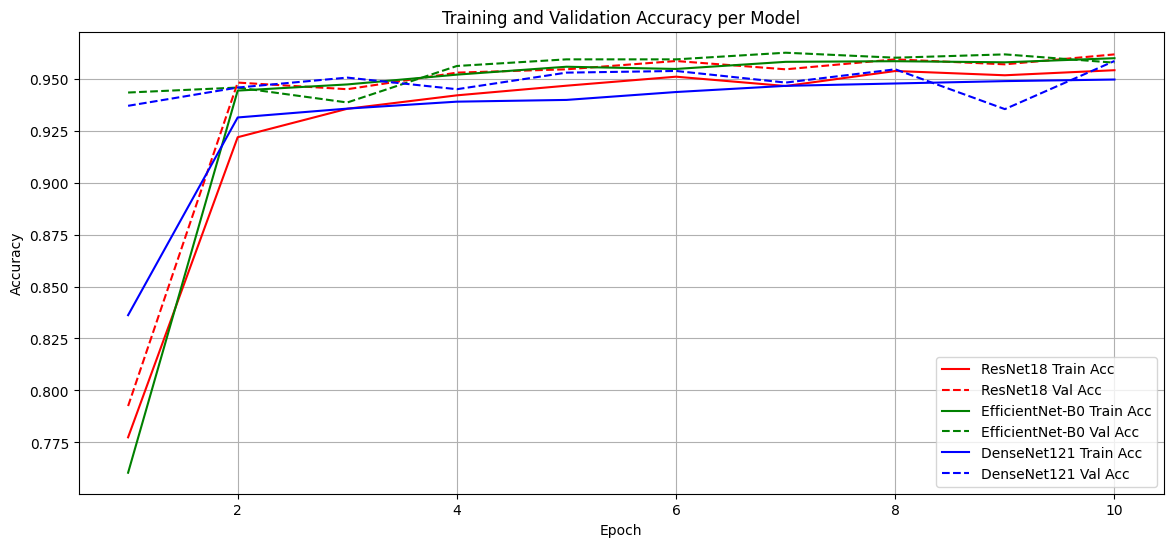

In [36]:
# Plot Accuracy Curves
plt.figure(figsize=(14,6))
plt.plot(epochs_range, resnet18_train_accs, 'r-', label='ResNet18 Train Acc')
plt.plot(epochs_range, resnet18_val_accs, 'r--', label='ResNet18 Val Acc')
plt.plot(epochs_range, effnet_train_accs, 'g-', label='EfficientNet-B0 Train Acc')
plt.plot(epochs_range, effnet_val_accs, 'g--', label='EfficientNet-B0 Val Acc')
plt.plot(epochs_range, densenet_train_accs, 'b-', label='DenseNet121 Train Acc')
plt.plot(epochs_range, densenet_val_accs, 'b--', label='DenseNet121 Val Acc')

plt.title('Training and Validation Accuracy per Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


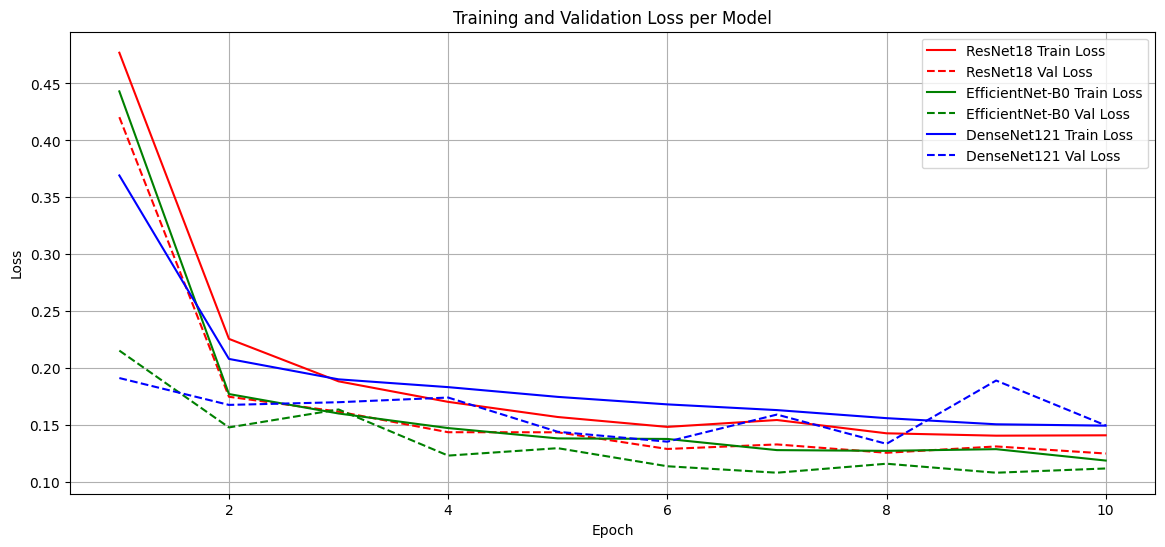

In [31]:
import matplotlib.pyplot as plt

epochs_range = range(1, num_epochs+1)

# Plot Loss Curves
plt.figure(figsize=(14,6))
plt.plot(epochs_range, resnet18_train_losses, 'r-', label='ResNet18 Train Loss')
plt.plot(epochs_range, resnet18_val_losses, 'r--', label='ResNet18 Val Loss')
plt.plot(epochs_range, effnet_train_losses, 'g-', label='EfficientNet-B0 Train Loss')
plt.plot(epochs_range, effnet_val_losses, 'g--', label='EfficientNet-B0 Val Loss')
plt.plot(epochs_range, densenet_train_losses, 'b-', label='DenseNet121 Train Loss')
plt.plot(epochs_range, densenet_val_losses, 'b--', label='DenseNet121 Val Loss')

plt.title('Training and Validation Loss per Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Final Accuracies
resnet18_train_final = resnet18_train_accs[-1] * 100
resnet18_val_final = resnet18_val_accs[-1] * 100

effnet_train_final = effnet_train_accs[-1] * 100
effnet_val_final = effnet_val_accs[-1] * 100

densenet_train_final = densenet_train_accs[-1] * 100
densenet_val_final = densenet_val_accs[-1] * 100

# Print Comparison
print("\n📊 Final Training vs Validation Accuracy:")
print("-------------------------------------------")
print(f"ResNet18        | Train Acc: {resnet18_train_final:.2f}% | Val Acc: {resnet18_val_final:.2f}%")
print(f"EfficientNet-B0 | Train Acc: {effnet_train_final:.2f}% | Val Acc: {effnet_val_final:.2f}%")
print(f"DenseNet121     | Train Acc: {densenet_train_final:.2f}% | Val Acc: {densenet_val_final:.2f}%")
print("-------------------------------------------")



📊 Final Training vs Validation Accuracy:
-------------------------------------------
ResNet18        | Train Acc: 95.41% | Val Acc: 96.17%
EfficientNet-B0 | Train Acc: 95.99% | Val Acc: 95.77%
DenseNet121     | Train Acc: 94.96% | Val Acc: 95.85%
-------------------------------------------


In [34]:
def evaluate_on_test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    test_accuracy = correct / total
    return test_accuracy


In [35]:
# Evaluate ResNet18
resnet_test_acc = evaluate_on_test(resnet18, test_loader, device)
print(f"📈 ResNet18 Test Accuracy: {resnet_test_acc*100:.2f}%")

# Evaluate EfficientNet-B0
effnet_test_acc = evaluate_on_test(effnet, test_loader, device)
print(f"📈 EfficientNet-B0 Test Accuracy: {effnet_test_acc*100:.2f}%")

# Evaluate DenseNet121
densenet_test_acc = evaluate_on_test(densenet, test_loader, device)
print(f"📈 DenseNet121 Test Accuracy: {densenet_test_acc*100:.2f}%")


📈 ResNet18 Test Accuracy: 94.57%
📈 EfficientNet-B0 Test Accuracy: 95.37%
📈 DenseNet121 Test Accuracy: 94.57%


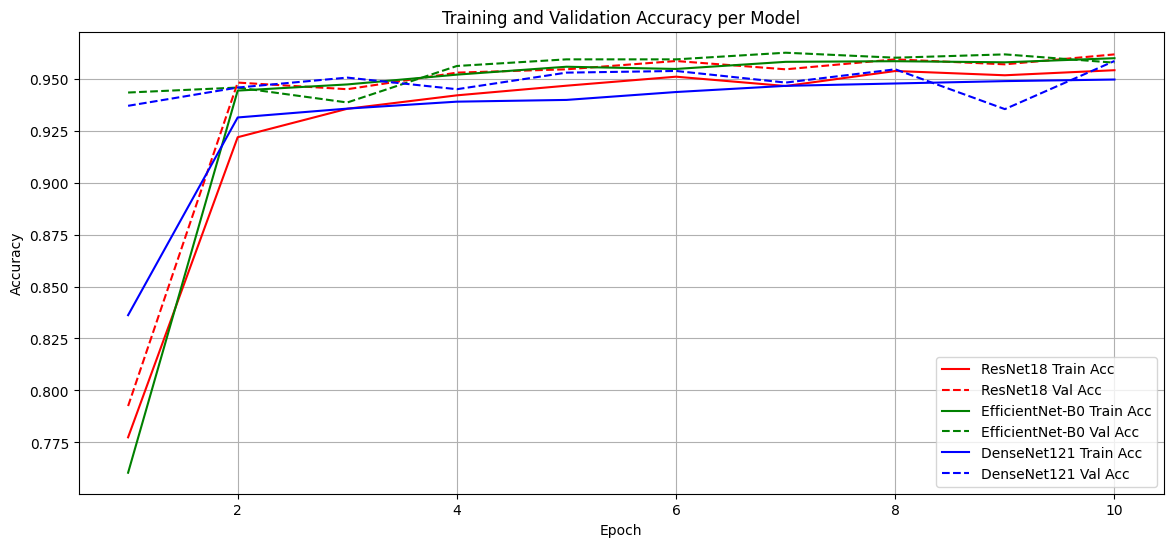

In [32]:
# Plot Accuracy Curves
plt.figure(figsize=(14,6))
plt.plot(epochs_range, resnet18_train_accs, 'r-', label='ResNet18 Train Acc')
plt.plot(epochs_range, resnet18_val_accs, 'r--', label='ResNet18 Val Acc')
plt.plot(epochs_range, effnet_train_accs, 'g-', label='EfficientNet-B0 Train Acc')
plt.plot(epochs_range, effnet_val_accs, 'g--', label='EfficientNet-B0 Val Acc')
plt.plot(epochs_range, densenet_train_accs, 'b-', label='DenseNet121 Train Acc')
plt.plot(epochs_range, densenet_val_accs, 'b--', label='DenseNet121 Val Acc')

plt.title('Training and Validation Accuracy per Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def full_model_evaluation(model, test_loader, device, class_names=["Parasitized", "Uninfected"], model_name="Model"):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # get probability for class 1
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs.cpu().numpy())
    
    # Classification report
    print(f"📋 Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.grid(False)
    plt.show()

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    average_precision = average_precision_score(y_true, y_probs)

    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AP={average_precision:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return average_precision


📋 Classification Report for model:
              precision    recall  f1-score   support

 Parasitized       0.95      0.94      0.94       309
  Uninfected       0.94      0.96      0.95       317

    accuracy                           0.95       626
   macro avg       0.95      0.95      0.95       626
weighted avg       0.95      0.95      0.95       626



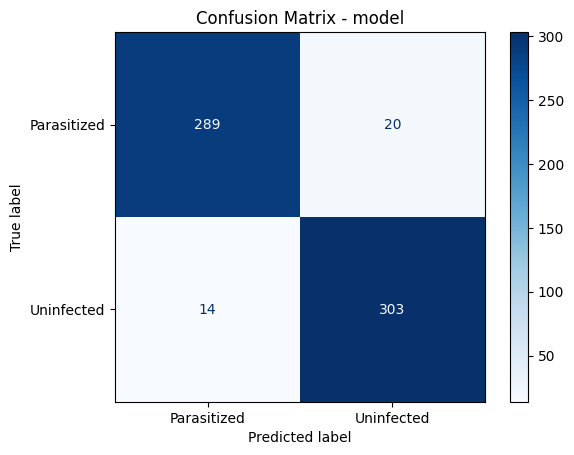

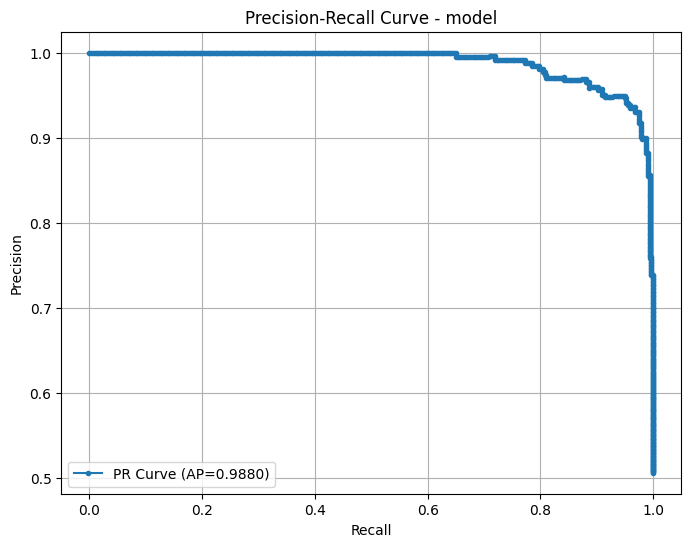

0.9880371960860804

In [46]:
full_model_evaluation(resnet18, test_loader, device, model_name="model")

📋 Classification Report for ResNet18:
              precision    recall  f1-score   support

 Parasitized       0.95      0.94      0.94       309
  Uninfected       0.94      0.96      0.95       317

    accuracy                           0.95       626
   macro avg       0.95      0.95      0.95       626
weighted avg       0.95      0.95      0.95       626



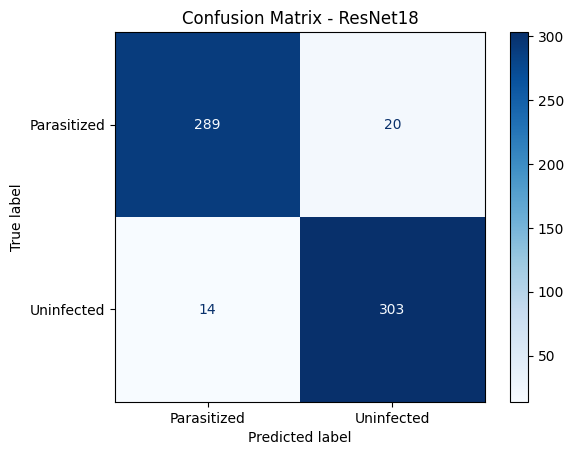

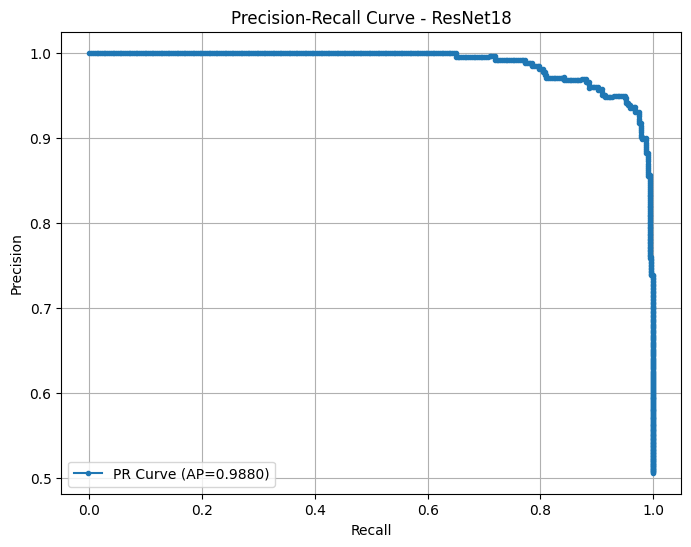

0.9880371960860804

In [43]:
full_model_evaluation(resnet18, test_loader, device, model_name="ResNet18")


📋 Classification Report for EfficientNet-B0:
              precision    recall  f1-score   support

 Parasitized       0.98      0.93      0.95       309
  Uninfected       0.93      0.98      0.96       317

    accuracy                           0.95       626
   macro avg       0.95      0.95      0.95       626
weighted avg       0.95      0.95      0.95       626



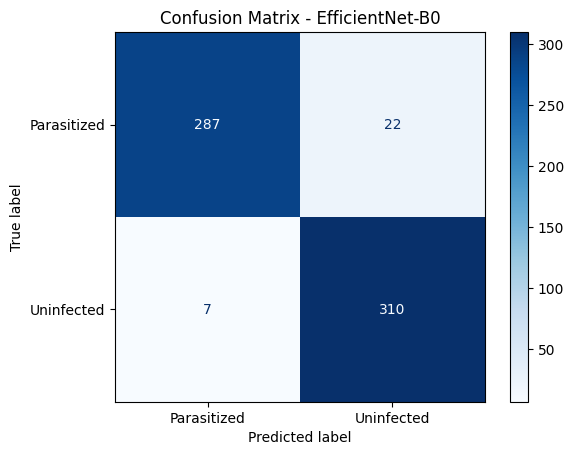

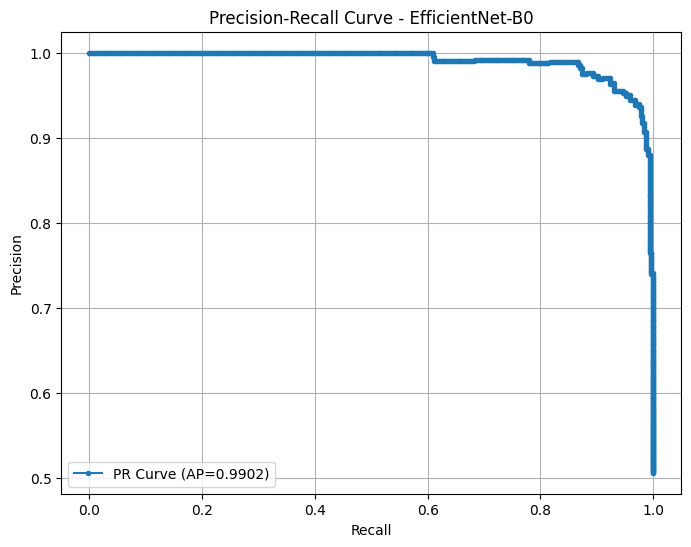

0.9902480829505711

In [44]:
full_model_evaluation(effnet, test_loader, device, model_name="EfficientNet-B0")


In [45]:
# --- Save the entire model (architecture + weights) ---

full_model_save_path = '/kaggle/working/basic_cnn_malaria_full.pth'
torch.save(model, full_model_save_path)

print(f"✅ Full model (structure + weights) saved at: {full_model_save_path}")


✅ Full model (structure + weights) saved at: /kaggle/working/basic_cnn_malaria_full.pth
